In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
df = pd.read_csv("data/train_cleaned.csv")


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
categorical_numeric_features = ["Id", "MSSubClass", "YrSold", "MoSold", "GarageCars"]
for category in categorical_numeric_features:
    df[category] = df[category].astype('category')

num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print(f"Numerical Features: {len(num_features)}")
print(f"Categorical Features: {len(cat_features)}")

Numerical Features: 32
Categorical Features: 44


In [5]:
for feature in num_features:
    n_unique = df[feature].nunique()
    print(f"{feature}: {n_unique} unique values")

LotFrontage: 202 unique values
LotArea: 1073 unique values
OverallQual: 10 unique values
OverallCond: 9 unique values
YearBuilt: 112 unique values
YearRemodAdd: 61 unique values
MasVnrArea: 327 unique values
BsmtFinSF1: 637 unique values
BsmtFinSF2: 144 unique values
BsmtUnfSF: 780 unique values
TotalBsmtSF: 721 unique values
1stFlrSF: 753 unique values
2ndFlrSF: 417 unique values
LowQualFinSF: 24 unique values
GrLivArea: 861 unique values
BsmtFullBath: 4 unique values
BsmtHalfBath: 3 unique values
FullBath: 4 unique values
HalfBath: 3 unique values
BedroomAbvGr: 8 unique values
KitchenAbvGr: 4 unique values
TotRmsAbvGrd: 12 unique values
Fireplaces: 4 unique values
GarageArea: 441 unique values
WoodDeckSF: 274 unique values
OpenPorchSF: 202 unique values
EnclosedPorch: 120 unique values
3SsnPorch: 20 unique values
ScreenPorch: 76 unique values
PoolArea: 8 unique values
MiscVal: 21 unique values
SalePrice: 663 unique values


Scatter plots?

In [6]:
def categorize_feature(df, feature, n_bins=5):
    """
    Categorizes a numerical feature into n bins.

    Parameters:
    - df (pd.DataFrame): The dataset containing the feature column.
    - feature (str): The name of the numerical feature to categorize.
    - n_bins (int): Number of categories to create.

    Returns:
    - pd.Series: A categorical feature representing the binned feature.
    """
    # Ensure the feature exists in the DataFrame
    if feature not in df.columns:
        raise ValueError(f"The dataframe must contain a '{feature}' column.")
    
    # If most values are zero, create a binary category
    if (df[feature] == 0).sum() / len(df) > 0.9:
        return df[feature].apply(lambda x: "No Feature" if x == 0 else "Has Feature").astype('category')

    # Use quantile-based binning to split the values into n categories
    df[f'{feature}'] = pd.qcut(df[feature], q=n_bins, duplicates="drop")

    return df[f'{feature}']

## Review this step in the end! PErhaps go through all transformed categories?

In [7]:
df_categorized = df.copy()


for feature in num_features:
    if df_categorized[feature].nunique()<30:
        df_categorized[feature] = categorize_feature(df_categorized,feature)
    n_unique = df_categorized[feature].nunique()
    print(f"{feature}: {n_unique} unique values")

LotFrontage: 202 unique values
LotArea: 1073 unique values
OverallQual: 4 unique values
OverallCond: 3 unique values
YearBuilt: 112 unique values
YearRemodAdd: 61 unique values
MasVnrArea: 327 unique values
BsmtFinSF1: 637 unique values
BsmtFinSF2: 144 unique values
BsmtUnfSF: 780 unique values
TotalBsmtSF: 721 unique values
1stFlrSF: 753 unique values
2ndFlrSF: 417 unique values
LowQualFinSF: 2 unique values
GrLivArea: 861 unique values
BsmtFullBath: 2 unique values
BsmtHalfBath: 2 unique values
FullBath: 3 unique values
HalfBath: 2 unique values
BedroomAbvGr: 3 unique values
KitchenAbvGr: 2 unique values
TotRmsAbvGrd: 5 unique values
Fireplaces: 2 unique values
GarageArea: 441 unique values
WoodDeckSF: 274 unique values
OpenPorchSF: 202 unique values
EnclosedPorch: 120 unique values
3SsnPorch: 2 unique values
ScreenPorch: 76 unique values
PoolArea: 2 unique values
MiscVal: 2 unique values
SalePrice: 663 unique values


In [8]:
num_features = df_categorized.select_dtypes(include=['int64', 'float64']).columns
cat_features = df_categorized.select_dtypes(include=['object']).columns

print(f"Numerical Features: {len(num_features)}")
print(f"Categorical Features: {len(cat_features)}")

Numerical Features: 18
Categorical Features: 44


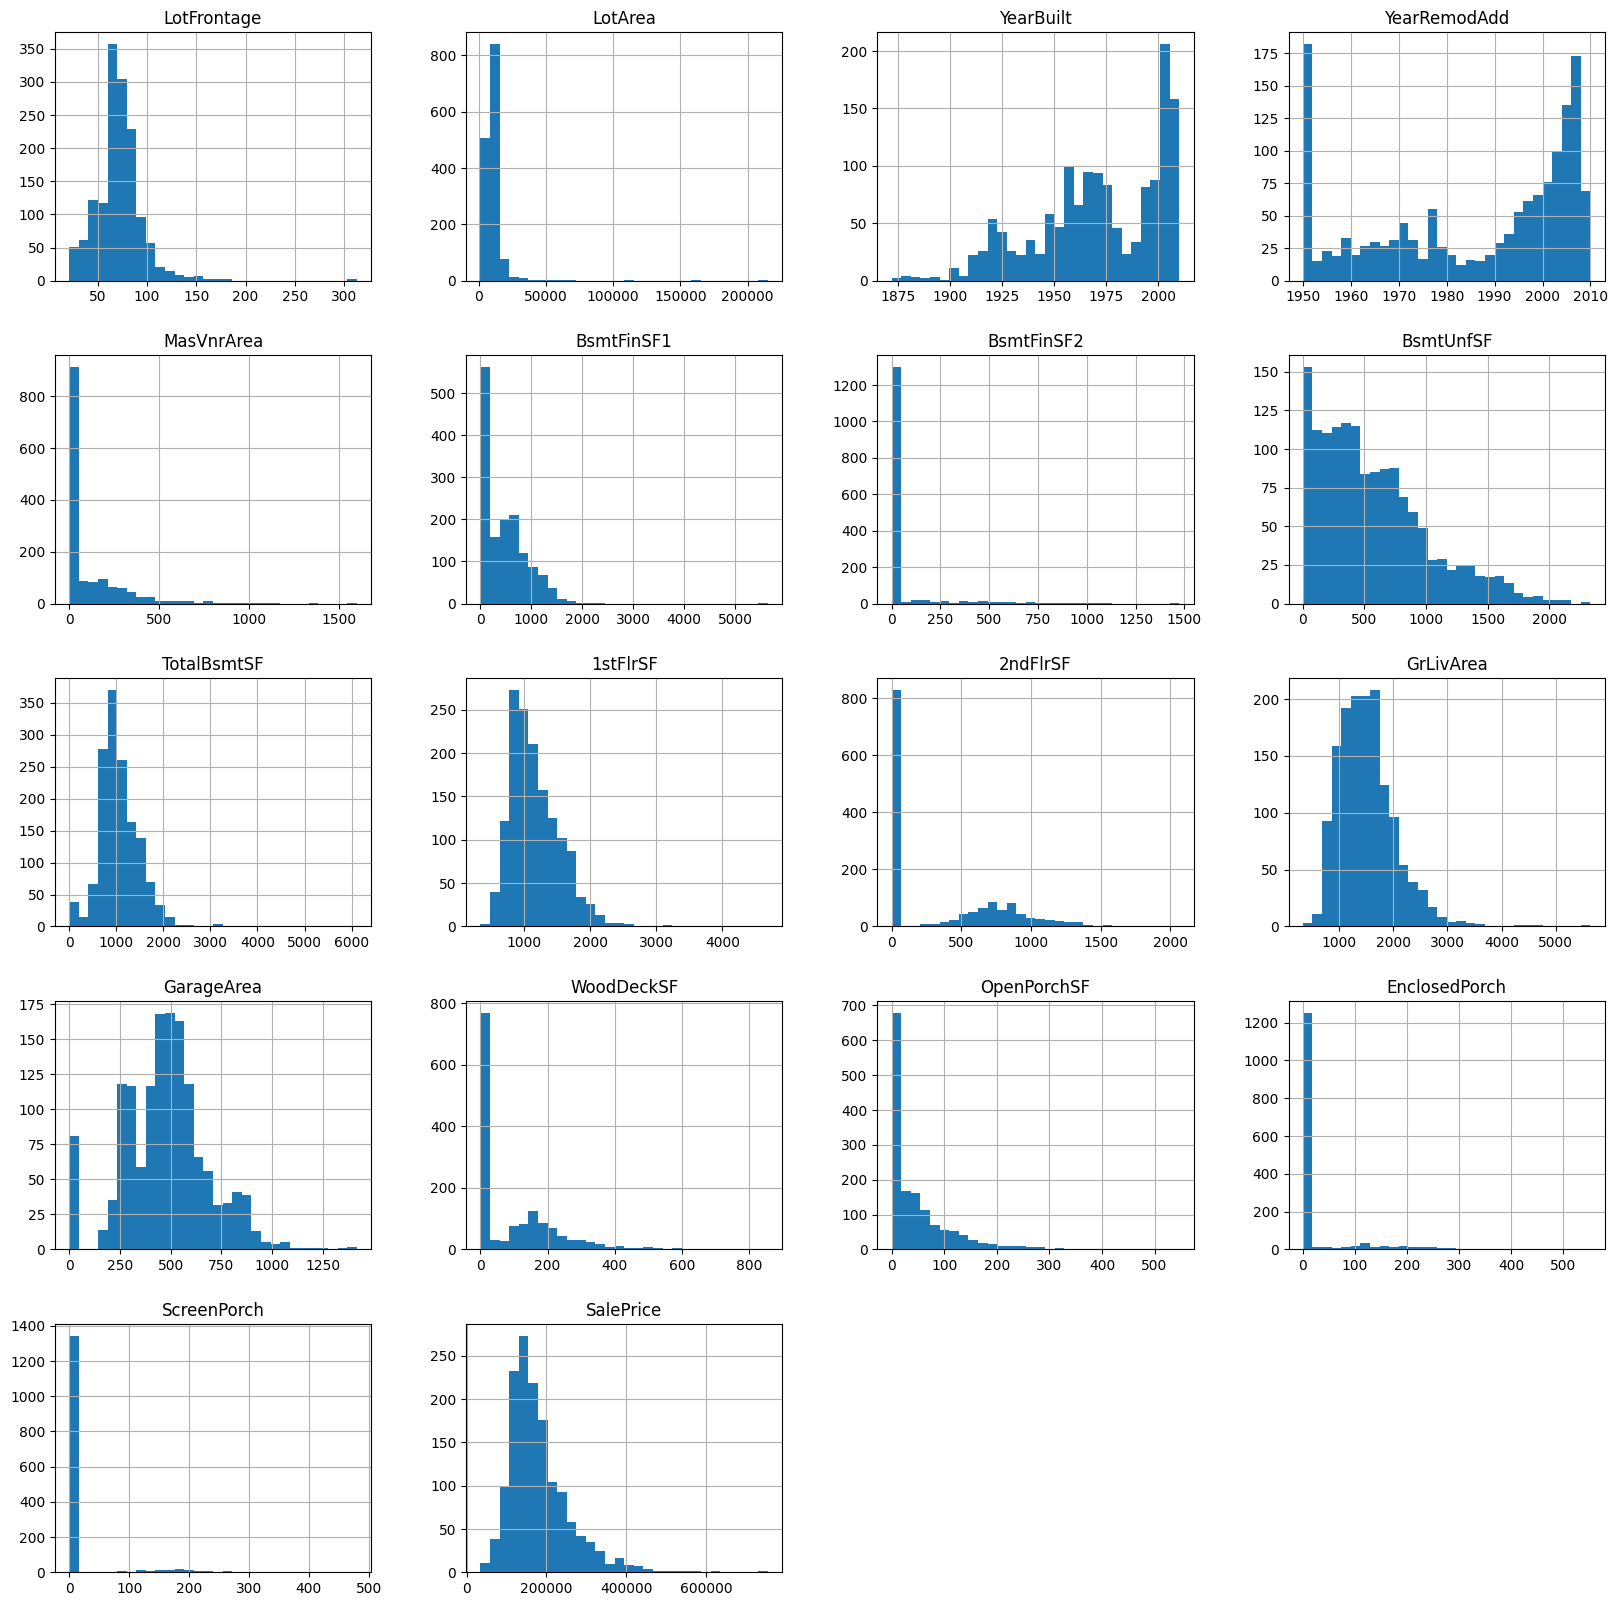

In [9]:
df_categorized[num_features].hist(figsize=(20, 20), bins=30)
plt.show()

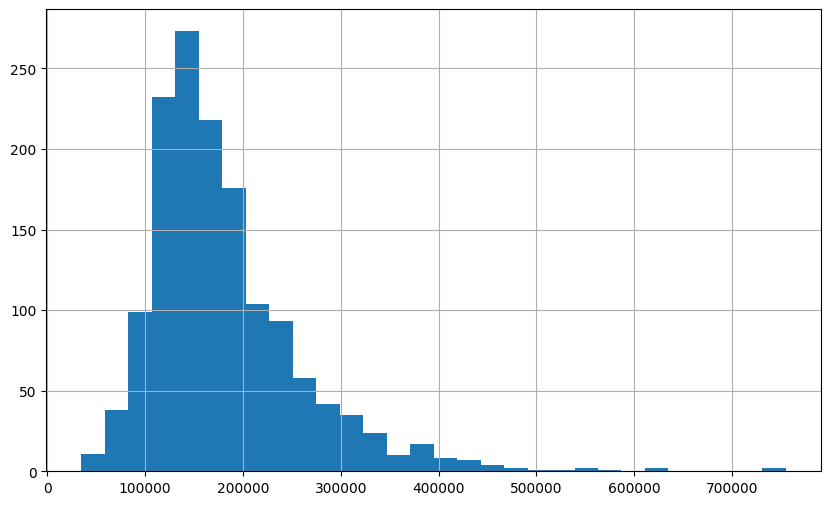

In [10]:
df["SalePrice"].hist(figsize=(10,6), bins=30)
plt.show()


In [11]:
skewness = df_categorized[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Display highly skewed features (skewness > 1 or < -1)
high_skew = skewness[abs(skewness) > 1]
print(f"There are {len(high_skew)} highly Skewed Features:\n", high_skew)

# Uncomment to display figure
# for feature in high_skew.index:
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     sns.histplot(df_categorized[feature].dropna(), kde=True)
#     plt.title(f'{feature} Distribution')
    
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=df_categorized[feature].dropna())
#     plt.title(f'{feature} Box Plot')
#     plt.tight_layout()
#     plt.show()

There are 13 highly Skewed Features:
 LotArea          12.195142
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
LotFrontage       2.022178
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


## expand this and remove most dangerous outliers

In [12]:
def detect_outliers(df, features):
    outlier_dict = {}
    
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_dict[col] = len(outliers)
    
    return {k: v for k, v in sorted(outlier_dict.items(), key=lambda item: item[1], reverse=True) if v > 0}

outliers = detect_outliers(df, num_features)
print("Features with Most Outliers:\n", outliers)


Features with Most Outliers:
 {'EnclosedPorch': 208, 'BsmtFinSF2': 167, 'ScreenPorch': 116, 'LotFrontage': 98, 'MasVnrArea': 98, 'OpenPorchSF': 77, 'LotArea': 69, 'TotalBsmtSF': 61, 'SalePrice': 61, 'WoodDeckSF': 32, 'GrLivArea': 31, 'BsmtUnfSF': 29, 'GarageArea': 21, '1stFlrSF': 20, 'YearBuilt': 7, 'BsmtFinSF1': 7, '2ndFlrSF': 2}


Transformation Summary:
               Original Skewness  Transformed Skewness
LotArea                12.195142             -0.137263
BsmtFinSF2              4.250888              2.521100
ScreenPorch             4.117977              3.147171
EnclosedPorch           3.086696              2.110104
MasVnrArea              2.674865              0.503014
OpenPorchSF             2.361912             -0.023373
LotFrontage             2.022178             -0.727851
SalePrice               1.880941              0.121222
BsmtFinSF1              1.683771             -0.617774
WoodDeckSF              1.539792              0.153379
1stFlrSF                1.375342              0.080032
GrLivArea               1.365156             -0.006134


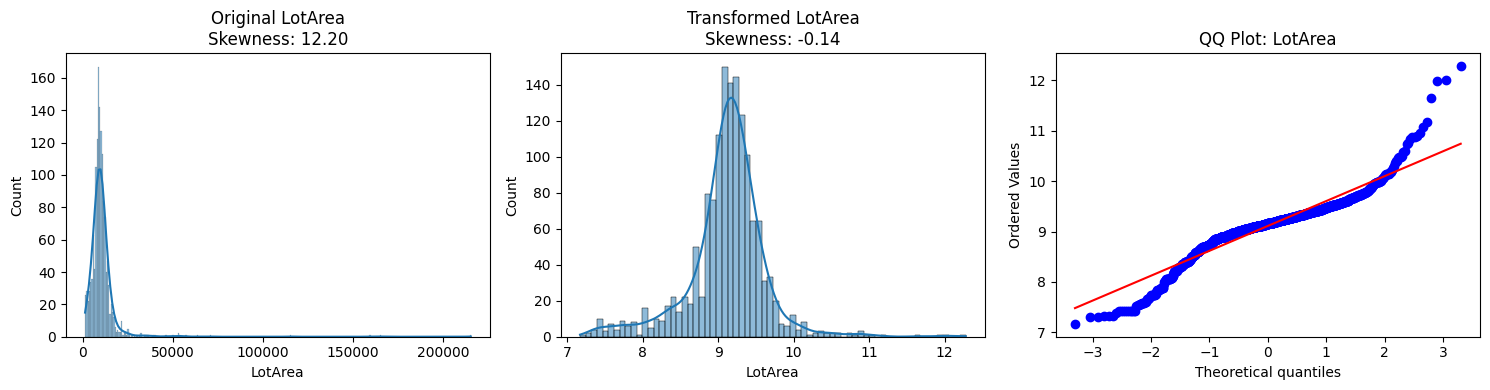

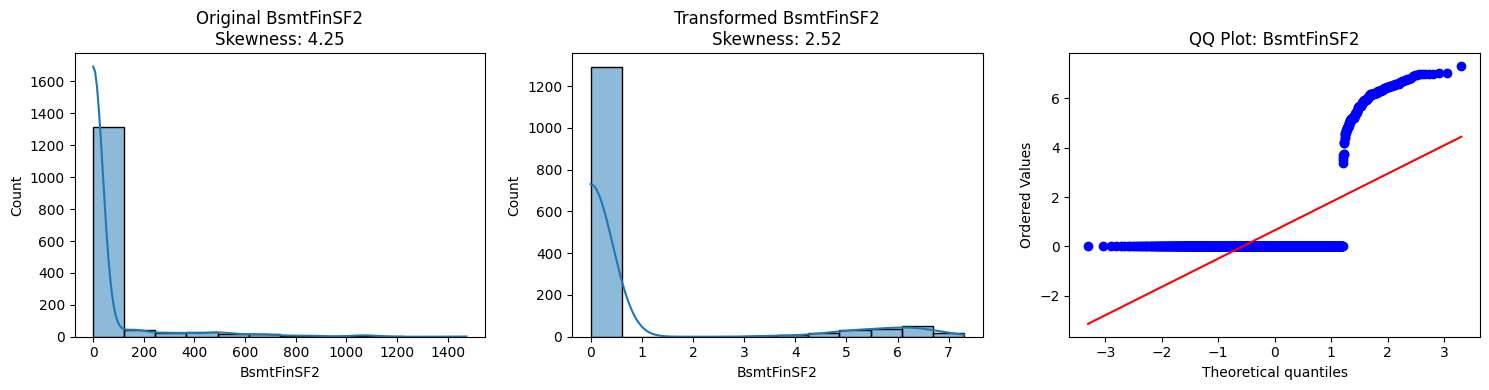

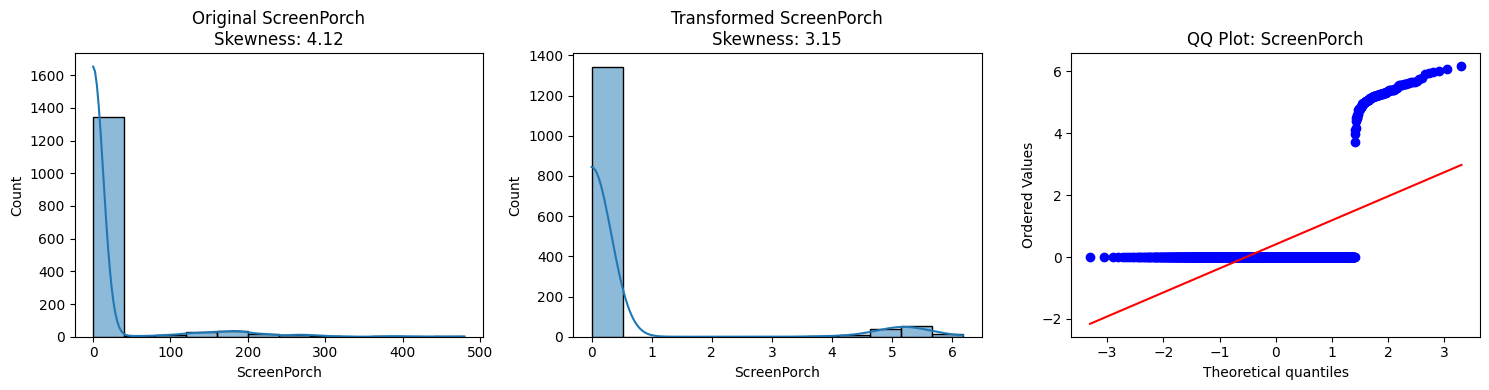

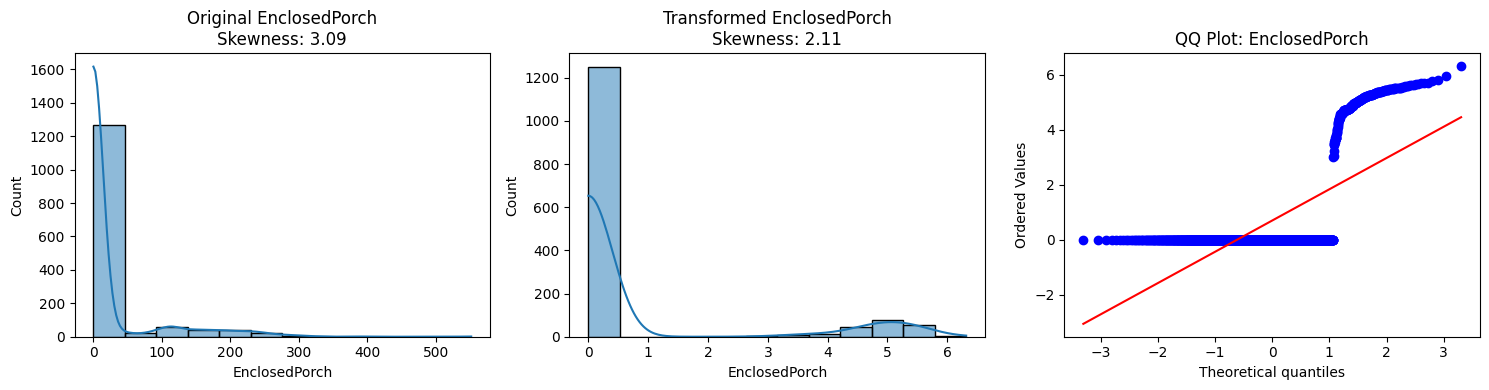

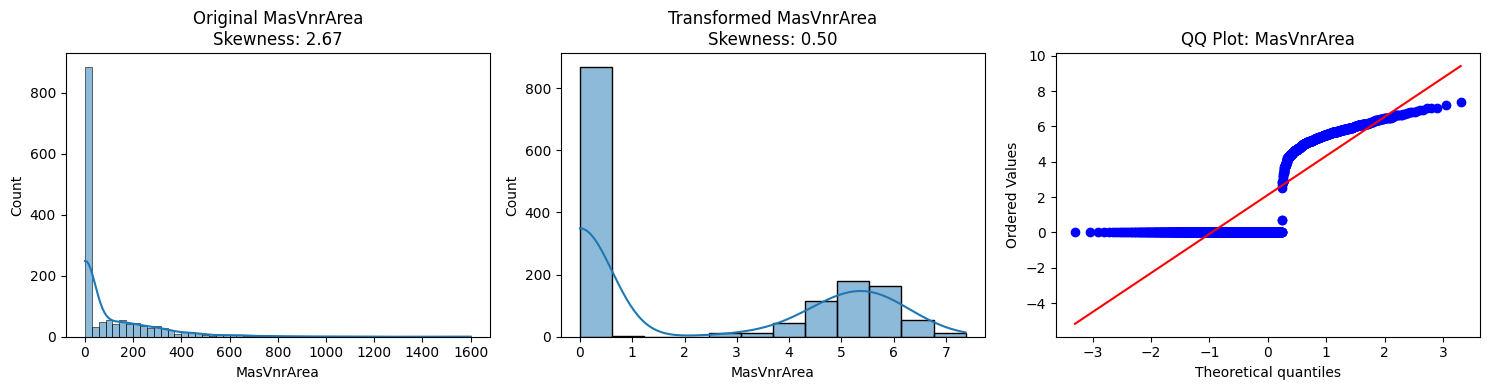

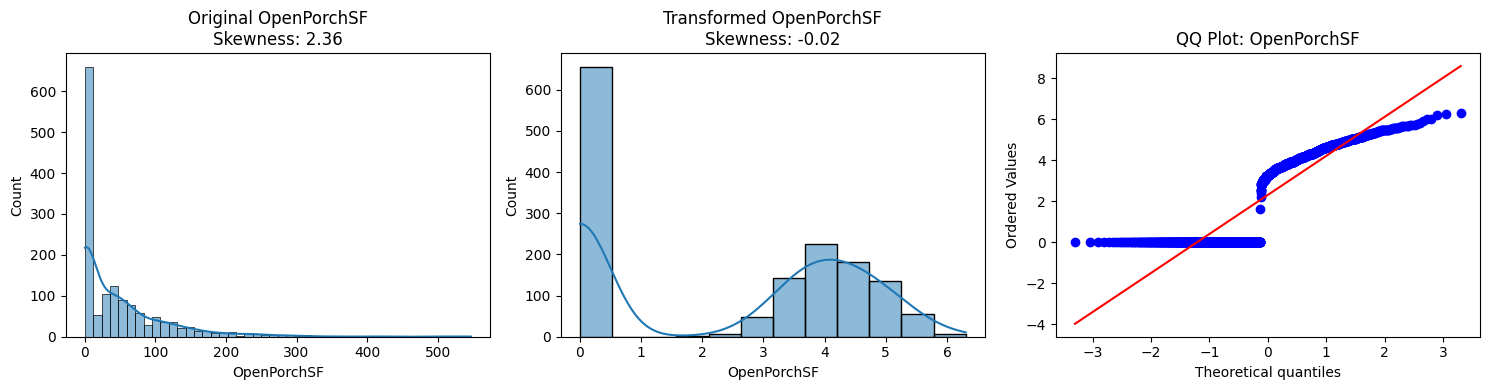

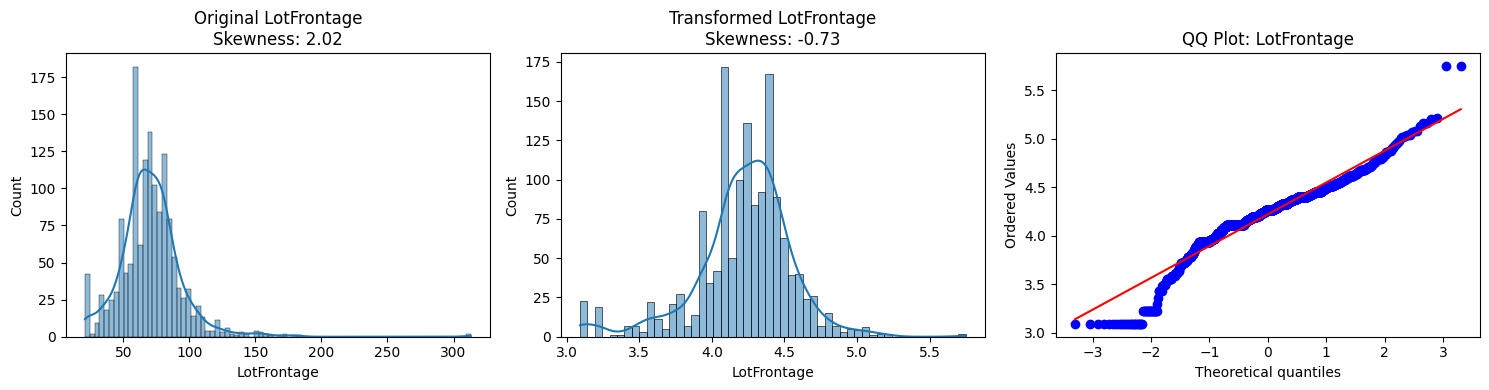

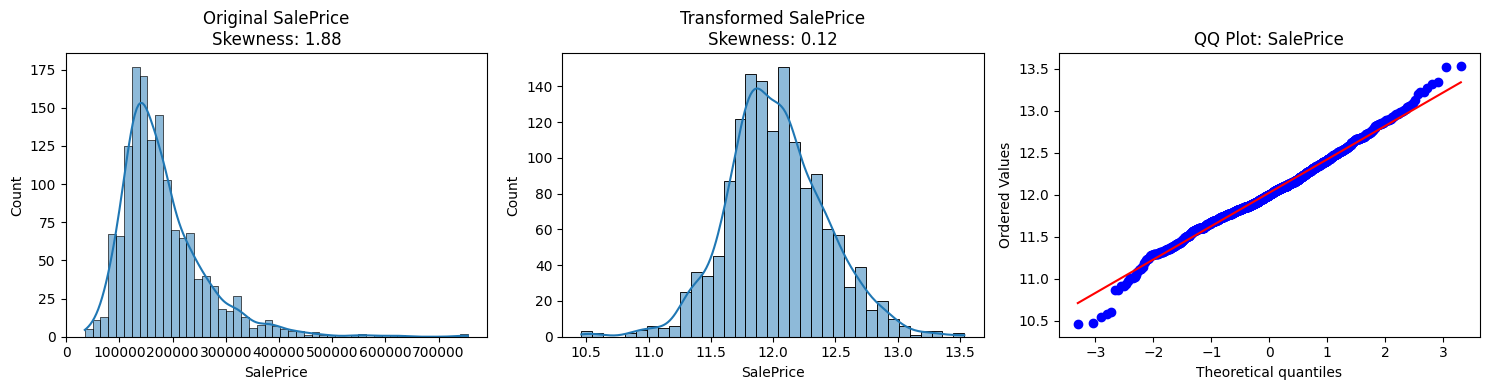

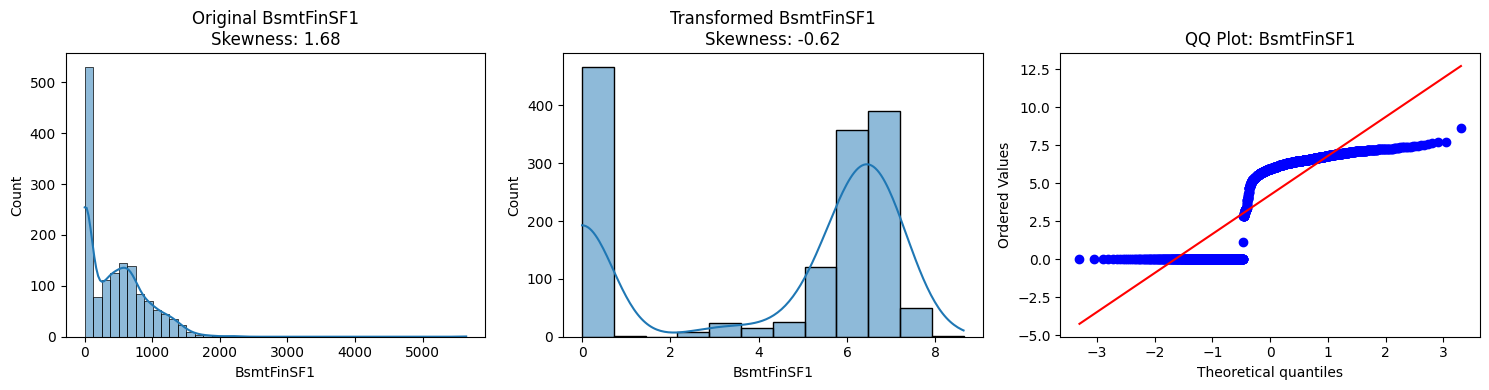

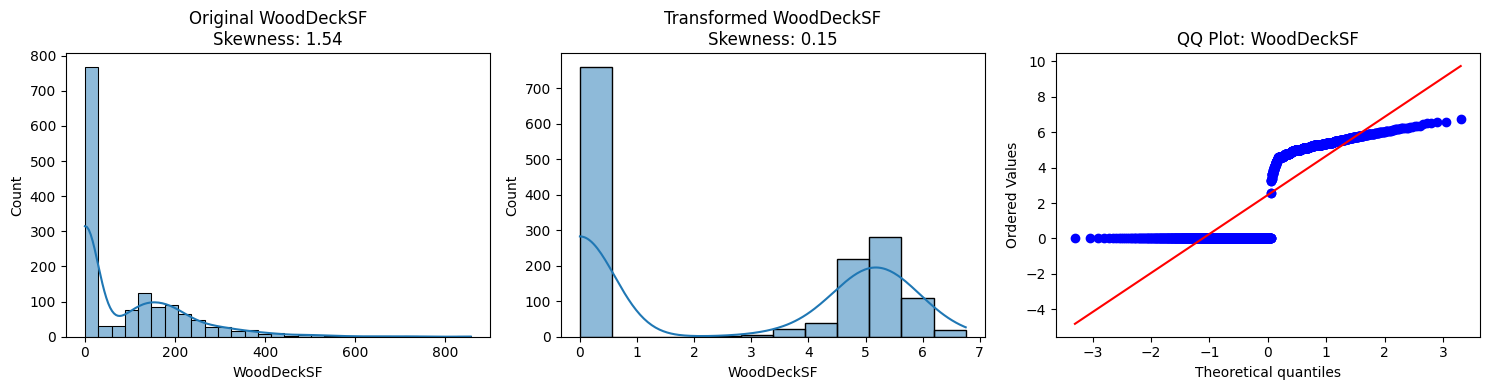

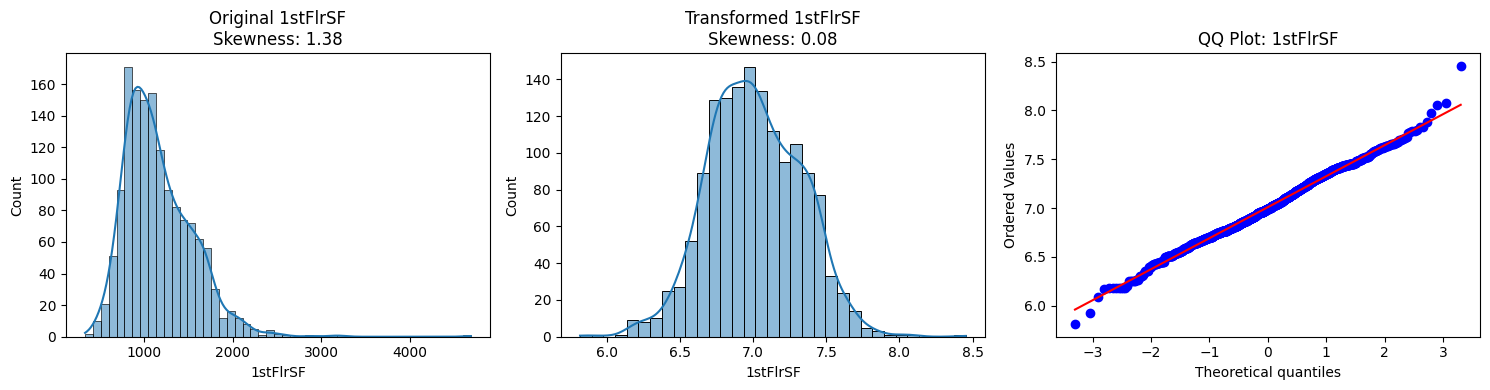

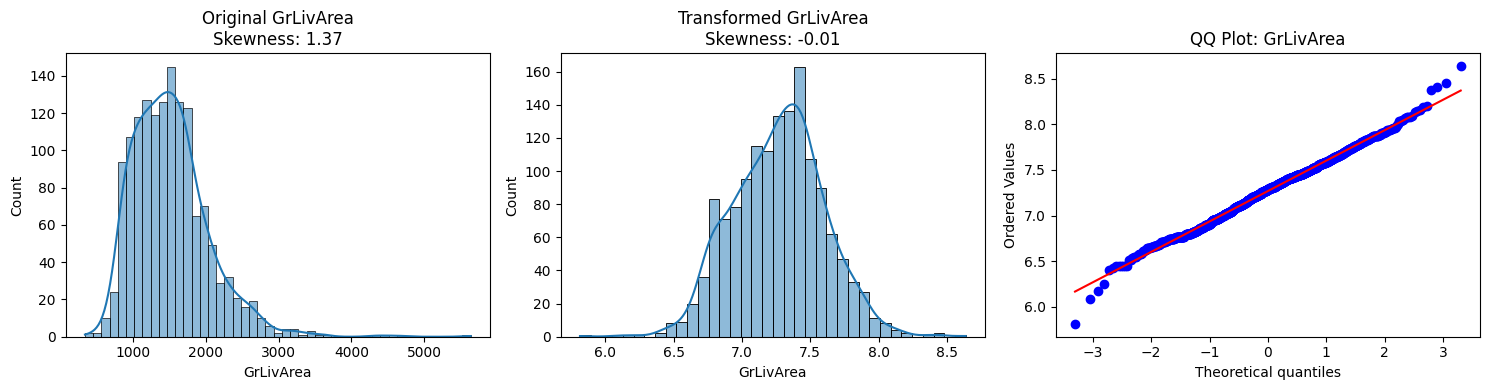

In [13]:


df_transformed = df_categorized.copy()

# checked that for TotalBsmtSF Log1 does not improve the skewness
features_to_transform = [feature for feature in high_skew.index if feature != 'TotalBsmtSF']

# Get the original skewness
original_skewness = df[features_to_transform].apply(lambda x: stats.skew(x.dropna()))

# Apply log1p transformation to features
transformed_data = pd.DataFrame(
    np.log1p(df[features_to_transform]), 
    columns=features_to_transform,
    index=df.index
)

# Replace original features with transformed values instead of creating new columns
for feature in features_to_transform:
    df_transformed[feature] = transformed_data[feature]

# Calculate new skewness for the transformed features
transformed_skewness = pd.Series({
    feature: stats.skew(df_transformed[feature].dropna()) 
    for feature in features_to_transform
})

# Create summary dataframe
transformation_summary = pd.DataFrame({
    'Original Skewness': original_skewness,
    'Transformed Skewness': [transformed_skewness[feature] for feature in features_to_transform]
})

# Sort by original skewness to see the most improved features
transformation_summary = transformation_summary.sort_values('Original Skewness', ascending=False)

# Display the summary
print("Transformation Summary:")
print(transformation_summary)

# Visualize before and after for the top most skewed features
top_features = transformation_summary.index[:18]  # Top 18 most skewed features

for feature in top_features:
    plt.figure(figsize=(15, 4))
    
    # Before transformation (using original data)
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Original {feature}\nSkewness: {original_skewness[feature]:.2f}')
    
    # After transformation
    plt.subplot(1, 3, 2)
    sns.histplot(df_transformed[feature].dropna(), kde=True)
    plt.title(f'Transformed {feature}\nSkewness: {transformed_skewness[feature]:.2f}')
    
    # QQ plot to check normality
    plt.subplot(1, 3, 3)
    stats.probplot(df_transformed[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot: {feature}')
    
    plt.tight_layout()
    plt.show()

In [14]:
skewness = df_transformed[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skew = skewness[abs(skewness) >1]
print(f"There are {len(high_skew)} highly Skewed Features:\n", high_skew)

There are 4 highly Skewed Features:
 ScreenPorch      3.147171
BsmtFinSF2       2.521100
EnclosedPorch    2.110104
TotalBsmtSF      1.522688
dtype: float64


For now I assume that this reduction in skewness is satisfactory and I will come back to that when trying out different models

In [15]:
# Correlation with target variable
corr_with_target = df_transformed[num_features].corrwith(df_transformed["SalePrice"]).sort_values(ascending=False)

# Show highly correlated features (above 0.5) and weakly correlated (below 0.1)
print("Highly Correlated Features with SalePrice:\n", corr_with_target[corr_with_target > 0.2])
print("\nWeakly Correlated Features:\n", corr_with_target[abs(corr_with_target) < 0.1])


Highly Correlated Features with SalePrice:
 SalePrice       1.000000
GrLivArea       0.730254
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.608955
YearBuilt       0.586570
YearRemodAdd    0.565608
OpenPorchSF     0.459948
MasVnrArea      0.413318
LotArea         0.399923
LotFrontage     0.365106
WoodDeckSF      0.343039
2ndFlrSF        0.319300
BsmtUnfSF       0.221985
BsmtFinSF1      0.208099
dtype: float64

Weakly Correlated Features:
 BsmtFinSF2   -0.030361
dtype: float64


In [16]:
# Compute correlation matrix
df_copy = df_transformed[num_features].copy()

#check if the last column is sale price.
if df_copy.columns[-1] == "SalePrice":
    df_copy = df_copy.drop(df_copy.columns[[-1]], axis=1)
else:
    print("SalePrice was not the last column, or was not present")
    print("The last column found was: ", df_copy.columns[-1])

corr_matrix = df_copy.corr()

# Find pairs with correlation > 0.5
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr[0] > 0.6]
high_corr = high_corr[high_corr["level_0"] != high_corr["level_1"]].drop_duplicates()

print("Highly Correlated Feature Pairs:\n", high_corr)

Highly Correlated Feature Pairs:
          level_0      level_1         0
1    LotFrontage      LotArea  0.745041
17       LotArea  LotFrontage  0.745041
145  TotalBsmtSF     1stFlrSF  0.779616
161     1stFlrSF  TotalBsmtSF  0.779616
181     2ndFlrSF    GrLivArea  0.662944
197    GrLivArea     2ndFlrSF  0.662944


We will use pairwise PCA and take the 1st PC from each highly correlated pairs since they already explain most of the variance 

In [17]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Define your pairs of correlated features
pairs = [
    ['TotalBsmtSF', '1stFlrSF'],
    ['2ndFlrSF', 'GrLivArea'],
    ['LotArea', 'LotFrontage']
]

# Create a new dataframe for PCA components
pca_components = pd.DataFrame(index=df.index)

# Apply PCA to each pair separately
for i, pair in enumerate(pairs):
    # Skip pairs with missing values or handle them appropriately
    if df_copy[pair].isna().any().any():
        # Either impute missing values first or handle the pair differently
        df_pair = df_copy[pair].fillna(df_copy[pair].mean())
    else:
        df_pair = df_copy[pair]
    
    # Apply PCA to just this pair
    pca = PCA(n_components=1)
    pair_result = pca.fit_transform(df_pair)
    
    # Add the result to the components dataframe with a descriptive name
    pair_name = f"{pair[0]}_{pair[1]}_PC"
    pca_components[pair_name] = pair_result.flatten()
    
    # Optionally print explained variance for this pair
    print(f"Pair {pair[0]} & {pair[1]} - Variance explained: {pca.explained_variance_ratio_[0]:.2f}")

# Create final dataframe without the original correlated features
flat_pairs = [item for sublist in pairs for item in sublist]  # Flatten the list of pairs
df_new = df.drop(flat_pairs, axis=1)
df_PCA = pd.concat([df_new, pca_components], axis=1)

# Print shape to confirm
print(f"Original df shape: {df.shape}, New df shape: {df_PCA.shape}")


Pair TotalBsmtSF & 1stFlrSF - Variance explained: 1.00
Pair 2ndFlrSF & GrLivArea - Variance explained: 1.00
Pair LotArea & LotFrontage - Variance explained: 0.90
Original df shape: (1460, 81), New df shape: (1460, 78)


In [25]:


def analyze_categorical_features(df_input, cat_features, target='SalePrice', columns_to_drop=None):
    """
    Main function to analyze categorical features with option to drop columns
    
    Parameters:
    -----------
    df_input : DataFrame
        The input dataframe to analyze
    cat_features : list
        List of categorical feature names
    target : str
        Target variable name
    columns_to_drop : list, optional
        List of column names to drop from the analysis
    """
    # Make a copy of the input dataframe to avoid modifying the original
    df = df_input.copy()
    
    # Drop specified columns if provided
    if columns_to_drop is not None and len(columns_to_drop) > 0:
        df = df.drop(columns=columns_to_drop)
        print(f"Dropped columns: {columns_to_drop}")
        
        # Update cat_features to remove any dropped columns
        cat_features = [col for col in cat_features if col not in columns_to_drop]
        print(f"Remaining categorical features: {len(cat_features)}")
    
    # Get the global average sale price for the reference line
    global_avg_price = df[target].mean()
    
    # Function to analyze a single categorical feature
    def analyze_categorical_feature(col):
        plt.figure(figsize=(14, 6))
        
        # Plot 1: Distribution of categories
        plt.subplot(1, 2, 1)
        counts = df[col].value_counts()
        sns.countplot(y=col, data=df, order=counts.index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        
        # Plot 2: Relationship with target
        plt.subplot(1, 2, 2)
        # Sort categories by their mean price
        cat_means = df.groupby(col)[target].mean().sort_values()
        cat_order = cat_means.index
        
        # Create box plot with sorted categories
        sns.boxplot(x=col, y=target, data=df, order=cat_order)
        plt.axhline(global_avg_price, color='r', linestyle='--', label=f'Avg {target}: ${global_avg_price:,.0f}')
        plt.legend()
        plt.title(f'{target} by {col}')
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Calculate statistics
        stats_df = df.groupby(col)[target].agg(['count', 'mean', 'median', 'std']).sort_values('mean', ascending=False)
        
        # Add percent diff from global average
        stats_df['diff_from_avg'] = ((stats_df['mean'] - global_avg_price) / global_avg_price * 100).round(1)
        stats_df = stats_df.rename(columns={'diff_from_avg': '% diff from avg'})
        
        # Do I need that???
        #################################################################
        # Format money columns
        stats_df['mean'] = stats_df['mean'].apply(lambda x: f"${x:,.0f}")
        stats_df['median'] = stats_df['median'].apply(lambda x: f"${x:,.0f}")
        stats_df['std'] = stats_df['std'].apply(lambda x: f"${x:,.0f}")
        
        print(f"\nStatistics for {col}:")
        print(stats_df)
        
        # Calculate ANOVA to check if differences between categories are significant
        categories = df[col].unique()
        if len(categories) > 1:  # Only do ANOVA if we have at least 2 categories
            anova_groups = [df[df[col] == cat][target].values for cat in categories]
            anova_result = stats.f_oneway(*anova_groups)
            print(f"ANOVA p-value: {anova_result.pvalue:.6f} {'(Significant)' if anova_result.pvalue < 0.05/len(cat_features) else '(Not significant)'}")
        
        # Feature information
        print(f"Number of categories: {df[col].nunique()}")
        
        return stats_df
    
    # Function to prioritize categorical features
    def prioritize_categorical_features():
        feature_stats = []
        
        for col in cat_features:
            # Calculate ANOVA 
            categories = df[col].unique()
            if len(categories) > 1:
                anova_groups = [df[df[col] == cat][target].values for cat in categories]
                # Filter out empty groups
                anova_groups = [group for group in anova_groups if len(group) > 0]
                if len(anova_groups) > 1:
                    anova_result = stats.f_oneway(*anova_groups)
                    p_value = anova_result.pvalue
                else:
                    p_value = 1.0
            else:
                p_value = 1.0
            
            # Calculate max price difference between categories
            cat_means = df.groupby(col)[target].mean()
            if len(cat_means) > 0:
                price_range = cat_means.max() - cat_means.min()
                price_ratio = cat_means.max() / cat_means.min() if cat_means.min() > 0 else float('inf')
            else:
                price_range = 0
                price_ratio = 1
                
            feature_stats.append({
                'Feature': col,
                'Categories': df[col].nunique(),
                'ANOVA_p': p_value,
                'Bonferroni significance': p_value < 0.05/len(cat_features),
                'Price_Range': price_range,
                'Price_Ratio': price_ratio
            })
        
        # Create DataFrame from statistics
        stats_df = pd.DataFrame(feature_stats)
        
        # Sort by statistical significance (ANOVA p-value)
        stats_df = stats_df.sort_values('ANOVA_p')
        
        return stats_df
    
    # Function to analyze features in batches
    def batch_analyze_categorical(batch_size=5, save_path=None):
        for i in range(0, len(cat_features), batch_size):
            batch = cat_features[i:i+batch_size]
            print(f"\n--- Analyzing batch {i//batch_size + 1}: {batch} ---")
            
            for feature in batch:
                if save_path:
                    plt.figure(figsize=(14, 6))
                    
                    # Plot 1: Distribution of categories
                    plt.subplot(1, 2, 1)
                    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
                    plt.title(f'Distribution of {feature}')
                    
                    # Plot 2: Relationship with target
                    plt.subplot(1, 2, 2)
                    sns.boxplot(x=feature, y=target, data=df)
                    plt.axhline(global_avg_price, color='r', linestyle='--', 
                               label=f'Avg {target}: ${global_avg_price:,.0f}')
                    plt.legend()
                    plt.title(f'{target} by {feature}')
                    plt.xticks(rotation=45, ha='right')
                    
                    plt.tight_layout()
                    plt.savefig(f"{save_path}/{feature}_analysis.png")
                    plt.close()
                    
                    print(f"Saved plot for {feature}")
                else:
                    analyze_categorical_feature(feature)
                    
            # If displaying plots, ask to continue
            if not save_path:
                input(f"\nPress Enter to continue to next batch...")
    
    # Function to analyze least significant features
    def analyze_least_significant_features(n=5):
        # Prioritize features
        priority_df = prioritize_categorical_features()
        
        # Sort in reverse order to get least significant features
        least_significant = priority_df.sort_values('ANOVA_p', ascending=False)['Feature'].head(n).tolist()
        
        print(f"\n--- Analyzing {n} Least Significant Features ---")
        print("These features have the highest p-values (least statistical significance):")
        print(priority_df.sort_values('ANOVA_p', ascending=False).head(n)[['Feature', 'ANOVA_p', 'Price_Range']])
        
        # Analyze each feature
        for feature in least_significant:
            analyze_categorical_feature(feature)
            
        return least_significant
    
    # Function to compare most and least significant features
    def compare_feature_significance(n=5):
        # Prioritize features
        priority_df = prioritize_categorical_features()
        
        # Get most and least significant features
        most_sig = priority_df.head(n)['Feature'].tolist()
        least_sig = priority_df.tail(n)['Feature'].tolist()
        
        # Create a figure to compare distributions
        plt.figure(figsize=(15, 10))
        plt.suptitle('Comparing Most vs Least Significant Categorical Features', fontsize=16)
        
        # Create violin plots for most significant features
        for i, feature in enumerate(most_sig):
            plt.subplot(2, n, i+1)
            sns.violinplot(x=feature, y=target, data=df)
            plt.axhline(global_avg_price, color='r', linestyle='--')
            plt.title(f"Most Sig #{i+1}: {feature}")
            plt.xticks(rotation=45, ha='right')
        
        # Create violin plots for least significant features
        for i, feature in enumerate(least_sig):
            plt.subplot(2, n, n+i+1)
            sns.violinplot(x=feature, y=target, data=df)
            plt.axhline(global_avg_price, color='r', linestyle='--')
            plt.title(f"Least Sig #{i+1}: {feature}")
            plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()
        
        print("\nMost Significant Features:")
        print(priority_df.head(n)[['Feature', 'ANOVA_p', 'Price_Range', 'Price_Ratio']])
        
        print("\nLeast Significant Features:")
        print(priority_df.tail(n)[['Feature', 'ANOVA_p', 'Price_Range', 'Price_Ratio']])
        
        return priority_df
    
    # Return functions for use
    return {
        'analyze_feature': analyze_categorical_feature,
        'prioritize_features': prioritize_categorical_features,
        'batch_analyze': batch_analyze_categorical,
        'analyze_least_significant': analyze_least_significant_features,
        'compare_significance': compare_feature_significance
    }

# Verified that those columns do not have large Bonferroni significance (alpha<0.05)
columns_to_drop = []
# columns_to_drop = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'MiscFeature']

# Initialize the analysis with a copy of the dataframe
analysis = analyze_categorical_features(df_PCA, cat_features, columns_to_drop=columns_to_drop)

# Get feature priorities with dropped columns
priority_df = analysis['prioritize_features']()
# print("Feature priorities after dropping columns:")
print(priority_df)

# analysis['analyze_least_significant']()

# Compare feature significance with dropped columns
# analysis['compare_significance'](n=1)

# Analyze specific features
# analysis['analyze_feature']('Neighborhood')

          Feature  Categories        ANOVA_p  Bonferroni significance  \
8    Neighborhood          25  1.558600e-225                     True   
18      ExterQual           4  1.439551e-204                     True   
21       BsmtQual           5  8.158548e-196                     True   
30    KitchenQual           4  3.032213e-192                     True   
35   GarageFinish           4  6.228747e-115                     True   
32    FireplaceQu           6  2.971217e-107                     True   
34    GarageYrBlt          98   1.240485e-92                     True   
20     Foundation           6   5.791895e-91                     True   
33     GarageType           7   6.117026e-87                     True   
24   BsmtFinType1           7   2.386358e-71                     True   
27      HeatingQC           5   2.667062e-67                     True   
23   BsmtExposure           5   7.557758e-50                     True   
43  SaleCondition           6   7.988268e-44       

Dropping uncorrelated features which do not pass Bonferroni with 0.05/41

In [28]:
columns_to_drop = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'MiscFeature']
df_dropped = df_PCA.drop(columns = columns_to_drop)
print(df_dropped.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MoSold',

In [ ]:
df_dropped.to_csv('data/train_transformed.csv', index=False)